<h1 style = 'font-family:verdana'><center>DEVELOPMENT OF A MACHINE LEARNING MODEL TO ESTIMATE THE CREDIT WORTHINESS OF LOAN APPLICANTS</center></h1>

<h2  style = 'font-family:verdana'><center>JOSEPH SEGBEFIA (B1011628)</center></h2>
<h3  style = 'font-family:verdana'><center>GISMA Business School</center></h3>
<h4  style = 'font-family:verdana'> <center>MSc. Business Intelligence and Analytics</center></h4>

<h4  style = 'font-family:verdana'><center>Predictive Analytics</center></h4>

<h3 style = 'font-family:verdana'>ABSTRACT</h3>
<p style = 'font-family:verdana'>The objective of this project is to develop a machine learning model to help estimate or predict the credit worthiness of loan applicants. The estimation/prediction will be done by looking at some information (features) on each applicant. This is a case of supervised machine learning technique called classification, where the algorithm is first trained on features of each applicant, and used to classify new applicants as 'worthy' or 'not worthy' for a loan.</p>

<h3 style = 'font-family:verdana'>INTRODUCTION</h3>
<h5 style = 'font-family:verdana'>Problem Statement:</h5> 
<p style = 'font-family:verdana'>A payday loan company used human experts to assess the credit risk of 988 credit applications. The aim is to use this input to create a system that would estimate the credit risk of new applications.</p>
 
<p style = 'font-family:verdana'>In recent times, most industries are on the path of digital transformation and machine learning is at the center of this revolution. Institutions like banks, loan companies, e-commerce companies and hospitals usually employ machine learning to make their work easier. Of all the industries on the path of digital transformation, financial institutions, like loan companies and banks are at the top of the list of those that can benefit the most. Loan companies for example use machine learning which helps them become more agile, and also gives them the ability to process loans faster and more accurately.</p>
<p style = 'font-family:verdana'>This project seeks to employ the various techniques in machine learning to come up with a machine learning model and a system that will help loan companies predict the credit worthiness or otherwise unworthiness of new loan applicants. This system will be the core decision maker to segregate loan applicants into two groups where the worthy applicants get the loans approved and not worthy applicants do not receive any loans.</p>

<h3 style = 'font-family:verdana'>METHODOLOGY</h3>
<p style = 'font-family:verdana'>The methods that will be applied to arrive at building model is general referred to as the Data Science process. This process is a series of activities that takes place from data collection to model building. In this project, the data provided contains information on 988 loan applicants which makes up the data collection phase. The other phases are as follows:</p>
    <ol>
        <p style = 'font-family:verdana'><li>Data Cleaning: Here the data is examined for missing values, outliers and other data inconsistencies and problems. Missing values either are usually dealt with by removing them or replacing them with values that makes sense. The data provided contained no missing values. The outliers present in the data were discarded as they have negative effects on machine learning models and statistical tests.</li></p>
    <p style = 'font-family:verdana'><li>Data Exploration: The data was explored using python and pandas in order to gain first hand insights to the patterns and trends existent in the dataset. This provides an overview on the distributions of quantitative features and other information that might be important for building the machine learning model.</li></p>
    <p style = 'font-family:verdana'><li>Feature and Model Selection: The most important features of the dataset that have the greatest influence on the outcome of the model were selected using statistical methods like the two sample t-test, and the Chi-Square Test. Finally a gradient boosting classifier was employed to help predict the credit worthiness of new applicants.</li></p>
    </ol>
<p style = 'font-family:verdana'>This project is presented in two parts because of the requirement to stay within a certain number of words. This document contains the main findings and answers to the project questions which make up the document to satisfy the word count limit of 2500. Additionally, since this is a very practical work, the jupyter notebook and python codes have been added at the end of this document to show how the information presented in this document was arrived at. The jupyter notebook is not a part of the main document and such does not make up the word counts. It was only added to show proof of work.</p>

<h4 style = 'font-family:verdana'> The Data and Exploratory Data Analysis</h4>

In [1]:
#IMPORTING LIBRARIES AND DEPENDENCIES
#Import dependencies
%matplotlib inline

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#Statistics
from scipy.stats import iqr

#Associations and Hypothesis testing
from scipy.stats import ttest_ind #for perfoming two-sample t-tests
from scipy.stats import chi2_contingency

#Machine Learning
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score 
from sklearn import metrics

In [2]:
#Loading the data into a pandas dataframe called data
data = pd.read_excel('data.xlsx')

print('The dataframe has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataframe has 988 rows and 22 columns


In [3]:
data.head(2)

foreignworker      status                             credithistory  \
0           yes    < 0 Euro                         critical account/   
1           yes  < 200 Euro  existing credits paid back duly till now   

            purpose                      savings     employmentsince  \
0  radio/television  unknown/ no savings account       .. >= 7 years   
1  radio/television               ... < 100 Euro  1 <= ... < 4 years   

  otherdebtors     property otherinstallments housing  ... duration  \
0         none  real estate              none     own  ...        6   
1         none  real estate              none     own  ...       48   

  creditamount  installmentrate  residencesince  age  \
0         1169                4               4   67   
1         5951                2               2   22   

   numberofexsistingcredits  numberofliablepeople  gender  creditworthy  \
0                         2                     1    male        Worthy   
1                         1                     1  female    Not Worthy   

  creditamout_per_month  
0            194.833333  
1            123.979167  

[2 rows x 22 columns]

<h4 style = 'font-family:verdana'>The Data</h4>
<p style = 'font-family:verdana'> The dataset is made up of 988 rows. This means that it contains information on 988 loan applicants, where each row represents one applicant. In addition to the number of rows, it has twenty-two (22) columns (features). The features or columns include; 'foreignworker', 'status', 'credithistory', 'purpose', and 'savings' just to name a few. Among these features, is the target variable (the variable the machine learning model predicts) is the creditworthy column. In order for the machine learning model to predict the credit worthiness of future applicants, it must be first trained using the other features. The data types of the features in the dataset are: 'string' which is usually represnted as 'object' and 'numeric' usually represented as an 'integer (int64)' or a 'float (float64)'. The cell below shows the datatype and the non-null value counts for each column. As can be seen, the data contains no values.</p>
<p style = 'color:red'>Review this section</p>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   foreignworker             988 non-null    object 
 1   status                    988 non-null    object 
 2   credithistory             988 non-null    object 
 3   purpose                   988 non-null    object 
 4   savings                   988 non-null    object 
 5   employmentsince           988 non-null    object 
 6   otherdebtors              988 non-null    object 
 7   property                  988 non-null    object 
 8   otherinstallments         988 non-null    object 
 9   housing                   988 non-null    object 
 10  job                       988 non-null    object 
 11  phone                     988 non-null    object 
 12  duration                  988 non-null    int64  
 13  creditamount              988 non-null    int64  
 14  installmen

<h4 style = 'font-family:verdana'>Exploratory Data Analysis</h4>
<p style = 'font-family:verdana'> Exploratory Data Analysis (EDA) is usually on of the first things a data scientist or data analyst does to the data. The main purpose of performing Exploratory Data Analysis is to help the data scientist have a look at the data he has before making any assumptions. It helps to identify obvious errors and also to identify and understand patterns within the data, detect outliers and also to find relationships and associations between variables. In the next few cells, exploratory data analysis will be performed on the dataset to help bring out hidden information in the data before a machine learning model can be fitted. Some of the quantitative columns in the data have outliers that will affect the analysis to be conducted and the machine learning model that will be built later. In order to avoid these problems, all outliers will be removed from the dataset.</p>

  foreignworker    status      credithistory           purpose  \
0           yes  < 0 Euro  critical account/  radio/television   

                       savings employmentsince otherdebtors     property  \
0  unknown/ no savings account   .. >= 7 years         none  real estate   

  otherinstallments housing  ... duration creditamount  installmentrate  \
0              none     own  ...        6         1169                4   

   residencesince  age  numberofexsistingcredits  numberofliablepeople  \
0               4   67                         2                     1   

   gender  creditworthy creditamout_per_month  
0    male        Worthy            194.833333  

[1 rows x 22 columns]

The youngest applicant is 19 years
The oldest applicant is 75 years
The average age of an applicant is 35.46 years



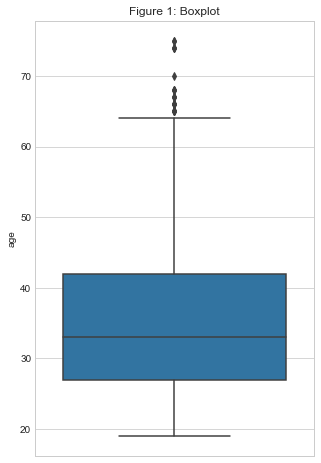

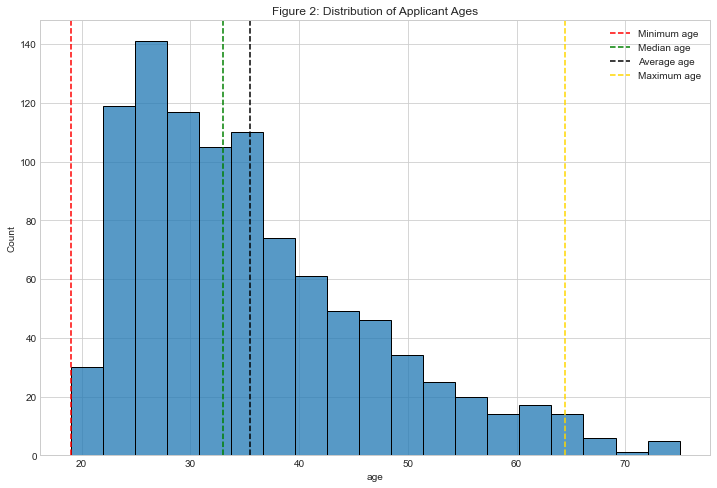

In [5]:
#Performing Exploratory Data Analysis
print(data.head(1)) #Printing the first row of the dataframe
print('')

#Extracting the ages of the loan applicants into a variable called ages
ages = data['age']
print('The youngest applicant is {} years'.format(np.min(ages)))
print('The oldest applicant is {} years'.format(np.max(ages)))
print('The average age of an applicant is {:.2f} years'.format(np.mean(ages)))
print('')

#Making a boxplot of the ages to reflect the median age, minimum age, maximum age, and any outliers present in the age
#column
plt.figure(figsize = (5, 8))
sns.boxplot(y = ages)
plt.title('Figure 1: Boxplot')
plt.show()
print('')


interquartile_range = iqr(ages)
third_quartile = np.quantile(ages, 0.75)
upper_extreme = third_quartile + (1.5 * interquartile_range)


#Making a histogram of the ages
plt.figure(figsize = (12, 8))
plt.title('Figure 2: Distribution of Applicant Ages')
sns.histplot(ages)
plt.axvline(np.min(ages), color = 'red', linestyle = 'dashed', label = 'Minimum age')
plt.axvline(np.median(ages), color = 'green', linestyle = 'dashed', label = 'Median age')
plt.axvline(np.mean(ages), color = 'black', linestyle = 'dashed', label = 'Average age')
plt.axvline(upper_extreme, color = 'gold', linestyle = 'dashed', label = 'Maximum age')
plt.legend()
plt.show()



<h5 style = 'font-family:verdana'>Applicant Ages</h5>
<p style = 'font-family:verdana'>Taking a look at the ages of the applicants in the dataset shows majority of the applicants are between 20 to 40 years as shown in the histogram (Figure 2) above. The youngest applicant is nineteen years, the oldest applicant is 75 years. The average age of the applicants is also around 35 years. This goes to show that applicants for loans as recorded in the dataset are mostly young. From the boxplot above (Figure 1), it can be observed that the there are unusually old applicants in the dataset. These applicant age group fall above the normal range of ages captured in the dataset. These age values are referred to as outliers because they differ from the normal occurrence in the dataset. From the histogram diagram above, values on the right hand side of the yellow dashed vertical line constitute the outliers. The histogram shows that the ages of the applicants are not normally distributed as majority of the ages fall to the left of the plot. This is because the mean is greater than the median causing the distribution to be skewed to the right.</p>

<h5 style = 'font-family:verdana'>Exploring Outliers</h5>
<p style = 'font-family:verdana'>When data is represented using a box and whisker plot, the outliers in the dataset are the points in the dataset that fall outside of the whiskers of the boxplot. Outliers are usually represented with a dot or an asterisk. It is an observation or data point that resides at an abnormal distance (more than 3 standard deviations from the sample mean) from other values in the sample. Outliers have the tendency of increasing the variability in a sample, which decreases statistical power. So, removing them can cause results to become statistically significant. Present in the given data are outliers in almost all the quantitative columns. Columns with outliers include, 'duration', 'creditamount', 'age', and others as shown by the boxplots below.</p>
<p style = 'font-family:verdana'>The column called numberofliablepeople only contains two unique values i.e 1, 2. So it was recoded as a categorical variable instead of a quantitative one.</p>

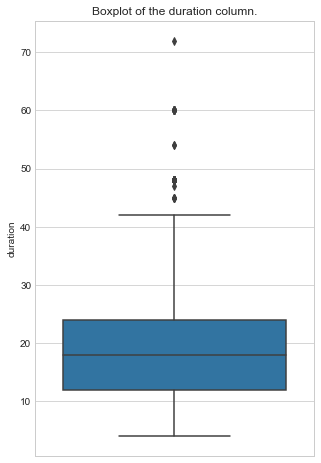

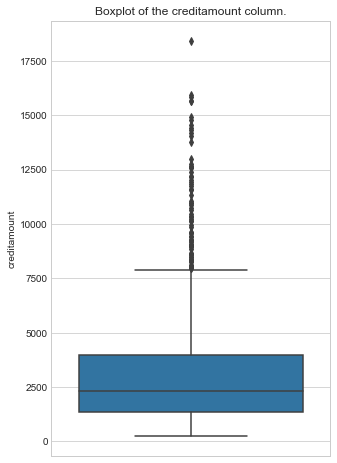

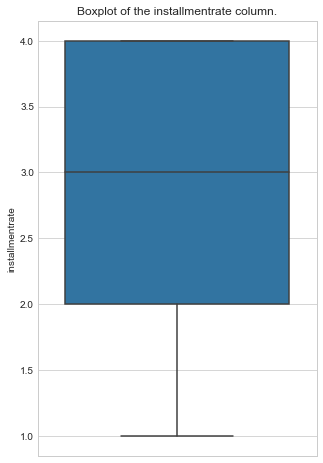

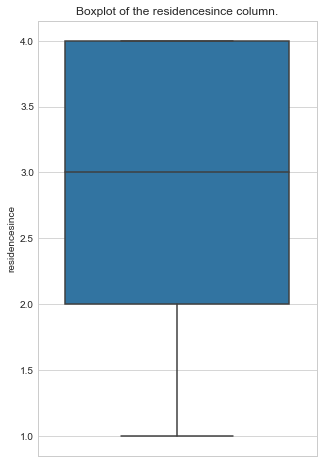

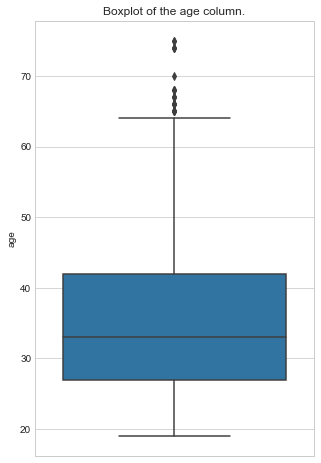

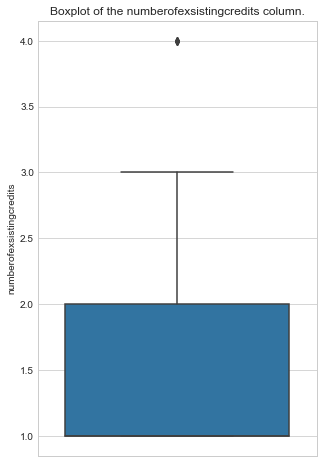

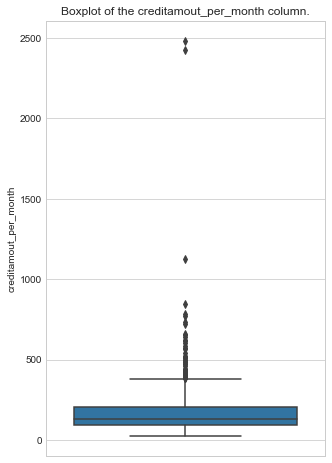

In [6]:
#Recoding the 'numberofliablepeople' column to an object type
data['numberofliablepeople'] = data['numberofliablepeople'].astype('str')

#Creating a function to detect outliers in all the quantitative columns in the data using a box and whisker plot
def outlier_detector(data):
    for col in data.columns:
        if data[col].dtypes == 'int' or data[col].dtypes == 'float':
            plt.figure(figsize = (5, 8))
            sns.boxplot(y = data[col])
            plt.title('Boxplot of the {} column.'.format(col))
            plt.show()

outlier_detector(data)


#A for loop to remove all outliers in the quantitative columns
for col in data.columns:
    if data[col].dtypes == 'int' or data[col].dtypes == 'float':
        interquartile_range = iqr(data[col])
        third_quartile = np.quantile(data[col], 0.75)
        upper_extreme = third_quartile + (1.5 * interquartile_range)
        data.drop(data[data[col] > upper_extreme].index, inplace = True)

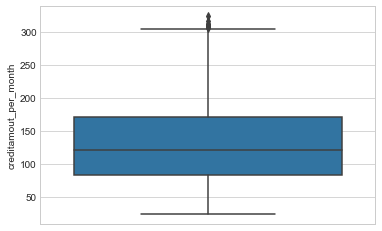

In [7]:
sns.boxplot(y = data['creditamout_per_month'])
plt.show()

There are a total of 521 male applicants in the data
There are a total of 252 female applicants in the data

Proportions:
male      0.673997
female    0.326003
Name: gender, dtype: float64

Number of worthy male applicants: 391
Number of unworthy male applicants: 130

Number of worthy female applicants: 170
Number of unworthy female applicants: 82


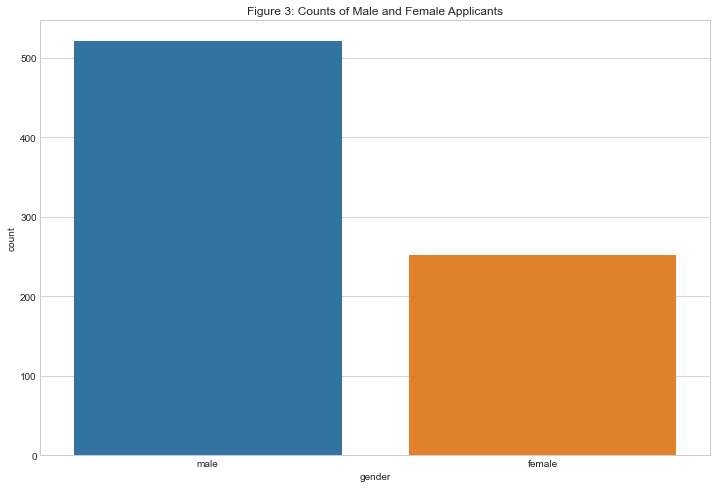

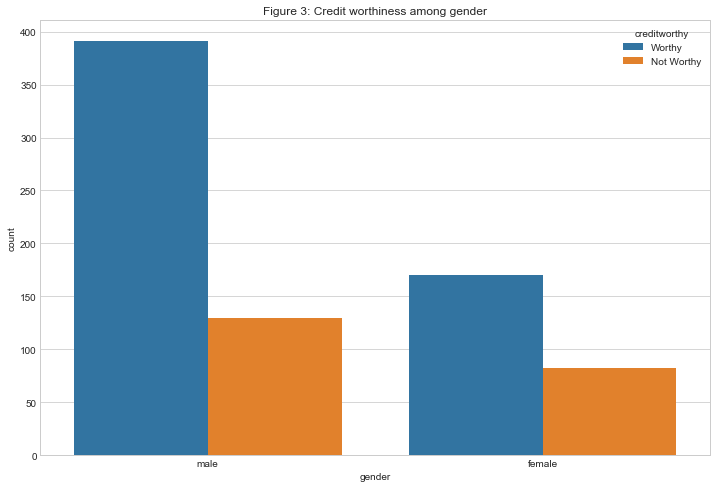

In [8]:
#Investigating the gender of applicants

#Finding the number of male and female applicants
male = data[data['gender'] == 'male']
female = data[data['gender'] == 'female']

print('There are a total of {} male applicants in the data'.format(len(male)))
print('There are a total of {} female applicants in the data'.format(len(female)))
print('')

#Proportions of male and female applicants
proportions = data['gender'].value_counts(normalize = True)
print('Proportions:')
print(proportions)
print('')

#Credit worthiness among the gender
male_worthy = male[male['creditworthy'] == 'Worthy']
male_unworthy = male[male['creditworthy'] == 'Not Worthy']

female_worthy = female[female['creditworthy'] == 'Worthy']
female_unworthy = female[female['creditworthy'] == 'Not Worthy']

print('Number of worthy male applicants: {}'.format(len(male_worthy)))
print('Number of unworthy male applicants: {}'.format(len(male_unworthy)))
print('')
print('Number of worthy female applicants: {}'.format(len(female_worthy)))
print('Number of unworthy female applicants: {}'.format(len(female_unworthy)))


#Visualizing the number of male and female applicants
plt.figure(figsize = (12, 8))
sns.countplot(x= data['gender'])
plt.title('Figure 3: Counts of Male and Female Applicants')
plt.show()
print('')

#Visualizing the number of male and female applicants found to be credit worthy or not
plt.figure(figsize = (12, 8))
sns.countplot(x = 'gender', hue = 'creditworthy', data = data)
plt.title('Figure 3: Credit worthiness among gender')
plt.show()

<h5 style = 'font-family:verdana'>Gender of Applicants</h5>
<p style = 'font-family:verdana'>The data was gathered on 988 loan applicants of which 683 are male making about 70% of the total number. The number of female applicants is 305 making up 30% of the data. The credit worthiness of applicants according to their gender shows that more male applicants were found to be credit worthy as compared to the females. This could be due the fact the there are more males in the dataset to begin with. But will that still be case when given a larger sample size where the number of males and females applicants are similar? This question could be answered using a hypothesis test.</p>

Number of worthy applicants: 561
Number of unworthy applicants: 212



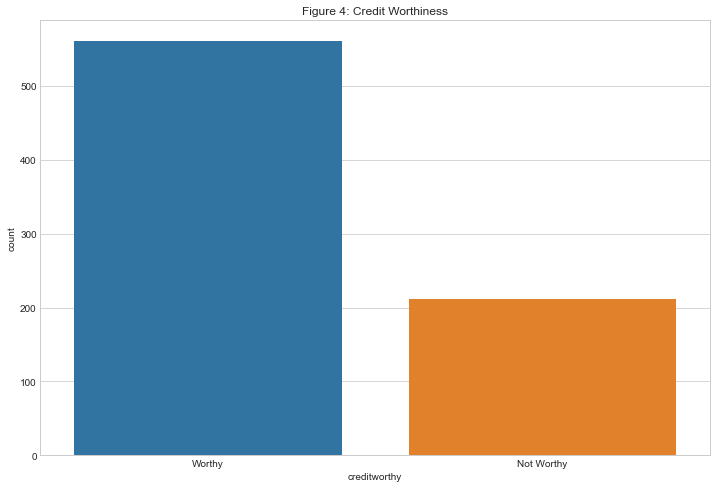

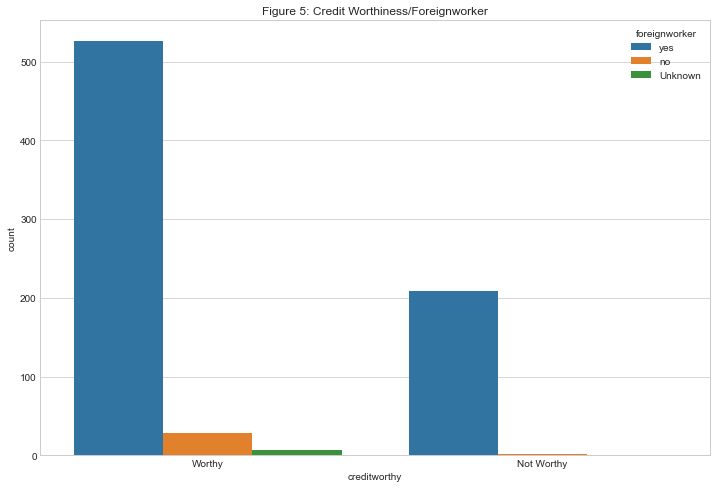


purpose       business  car (new)  car (used)  domestic appliances  education  \
creditworthy                                                                    
Not Worthy          17         68           2                    3         18   
Worthy              51        104          59                    8         21   

purpose       furniture/equipment  others  radio/television  repairs  \
creditworthy                                                           
Not Worthy                     47       1                48        7   
Worthy                        112       4               184       10   

purpose       retraining  
creditworthy              
Not Worthy             1  
Worthy                 8  


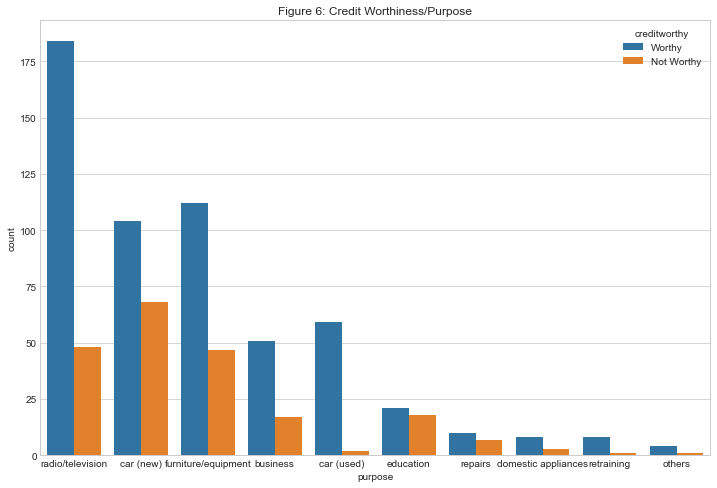

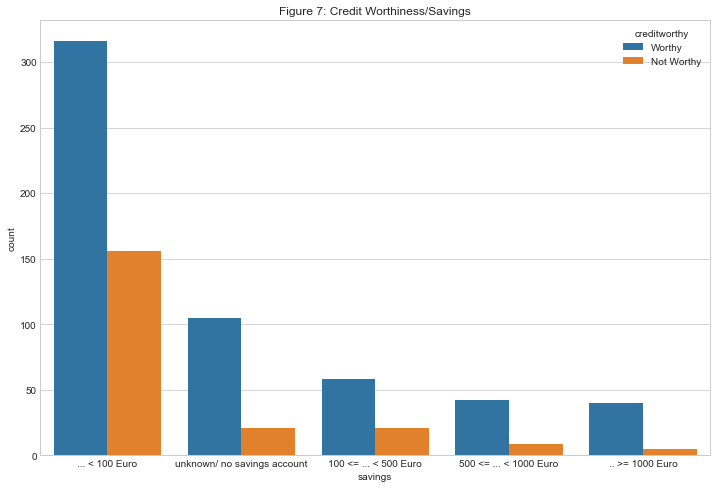

radio/television       232
car (new)              172
furniture/equipment    159
business                68
car (used)              61
education               39
repairs                 17
domestic appliances     11
retraining               9
others                   5
Name: purpose, dtype: int64

In [9]:
#Looking at the credit worthiness column

#Number of credit worthy applicants
worthy = data[data['creditworthy'] == 'Worthy']
unworthy = data[data['creditworthy'] == 'Not Worthy']

print('Number of worthy applicants: {}'.format(len(worthy)))
print('Number of unworthy applicants: {}'.format(len(unworthy)))
print('')

#Visualizing credit worthiness
plt.figure(figsize = (12, 8))
sns.countplot(x = 'creditworthy', data = data)
plt.title('Figure 4: Credit Worthiness')
plt.show()
print('')

plt.figure(figsize = (12, 8))
sns.countplot(x = 'creditworthy', hue = 'foreignworker', data = data)
plt.title('Figure 5: Credit Worthiness/Foreignworker')
plt.show()
print('')

#Contigency Table to find the purposes for which credit was given often
purpose_crosstab = pd.crosstab(data['creditworthy'], data['purpose'])
print(purpose_crosstab)

#Creditworthy/Purpose
plt.figure(figsize = (12, 8))
sns.countplot(x = 'purpose', hue = 'creditworthy', data = data, order = data['purpose'].value_counts().index)
plt.title('Figure 6: Credit Worthiness/Purpose')
plt.show()
print('')


#Credit worthy/Savings
plt.figure(figsize = (12, 8))
sns.countplot(x = 'savings', hue = 'creditworthy', data = data, order = data['savings'].value_counts().index)
plt.title('Figure 7: Credit Worthiness/Savings')
plt.show()

data['purpose'].value_counts()

<h5 style = 'font-family:verdana'>Credit Worthiness of Applicants</h5>
<p style = 'font-family:verdana'>The 'creditworthy' column in the dataframe gives information on which applicant is credit worthy or not worthy, depending on the combination of the other features. This is the column that a machine learning model will try to predict. From the data, it is observed that 691 of the applicants were found to be credit worthy while 297 were not worthy.</p>
    
<p style = 'font-family:verdana'>From the dataset, it is observed that a larger number of foreign workers were found to be more credit worthy as compared to non-foreign workers. Again, examining the purposes of the loans revealed some interesting insights from the data. One would have thought that loans or credits for education and business will be approved more, but the information in the dataset shows otherwise. It is seen that, loans for the purpose of 'television/radio' were leading in approvals, followed by loans for new cars, furniture/equipment and so on as shown in Figure 6.</p>
    
<p style = 'font-family:verdana'>Examining, the savings column against the creditworthy column shows that applicants with savings less than 100 euros and had their loans approved have a higher representation in the dataset among other savings amount approvals. Applicants again with savings less than 100 euros have a higher representation when it comes to disapprovals as well as shown in figure 7 above.</p>
    
<p style = 'font-family:verdana'>But then again, all these findings may be only peculiar to this sample and may not reflect the same findings should the sample size be increased. To find out if these findings are actually true, hypothesis testing techniques can be employed to quantify these uncertainties and conclude on what could be if more data could be collected.</p>

<p style = 'font-family:verdana'>From this 'mini' Exploratory Data Analysis conducted, very insightful information has been uncovered and paves the way for further analysis and model building.</p>

<h4 style = 'font-family:verdana'>Feature Selection</h4>
<p style = 'font-family:verdana'>In data science and machine learning, feature importance recognizes which features also referred to as columns or inputs in the dataset have the greatest effect on the outcomes of a machine learning model. Machine learning algorithms focus on different features in a dataset, depending on their properties. For example, features with strong linear trends have great impacts in linear algorithms like regression, while the nonlinear-based methods will make use of the more complex relationships in the data. Various techniques are applied by data scientists to investigate which features are meaningful to improving the accuracy and applicability of the models that they build.</p>
<p style = 'font-family:verdana'>It is important to know which features in the dataset impact the outcome of the model because it helps data scientists and business professionals to focus on the features that matter most, saving time and resources. For example, if an organisation pays for data to use in machine learning and AI projects from a third party company, but feature importance analysis indicates that none of the features are useful, then it saves the company money and time.</p>


<h4 style = 'font-family:verdana'>Most Important Determinants of Credit Risk</h4>
<p style = 'font-family:verdana'>Feature selection is one of the most important concepts in machine learning which highly impacts the performance of the machine learning model.Here, the available data will be analysed to extract the most important features, as irrelevant or partially relevant features will have a negative impact on the performance of the model. The model will be negatively impacted because, it will learn based on irrelevant features. Feature selection will be done on the data because:</p>
<ol>
    <li><p style = 'font-family:verdana'>It will help to reduce overfitting</p></li>
    <li><p style = 'font-family:verdana'>It will increase the accuracy of the model</p></li>
    <li><p style = 'font-family:verdana'>It will reduce training time</p></li>
</ol>
<p style = 'font-family:verdana'>With the credit data available, and before building a machine learning model to predict the credit worthiness of new applicants, the data scientist can use various techiniques to select which features have the most impact on the predicted values of the model. Features can selected from the data by investigating the various associations between each individual feature and the target feature, which in this case is the 'creditworthy' column.Examining the associations between variables helps the data scientist to know more about a feature given information about another. For example, in the credit data given, does knowing the gender of an applicant give us information on whether he/she was found to be credit worthy or not? Another example, does the age of an applicant determine his/her chances of being found to be credit worthy or not? These questions can be answered using various statistical methods based on the type of data being dealt with. Answers to questions like the ones previously asked will provide insight on which features are important to the model and those that are not.</p>

<h5 style = 'font-family:verdana'>Associations Between Features</h5>
<p style = 'font-family:verdana'>The statistical tests that will be used here will include:</p>
<ol>
    <li><p style = 'font-family:verdana'>Two-Sample t-test for testing the association between a binary categorical (variable that groups items into 2 distinct categories) variable and a quantitative variable. For example, the association between the age (quantitative variable) column and the creditworthy (binary categorical variable) column </p></li>.
    <li><p style = 'font-family:verdana'>Chi-Square Test for testing the association between a binary categorical variable and a categorical variable or an association between a categorical variable with 3 or more categories and a categorical variable. For example, the association between the purpose (categorical variable with 3 or categories) column with and the creditworthy column (binary categorical variable).</p></li>
</ol>
<p style = 'font-family:verdana'>There are other statistical tests like, one sample t-test, binomial test and ANOVA with Tukey's Range Test that can be used to examine associations between variables. These other tests do not apply to the credit data because the variable present in the data are quantitative (variables that be quantified with a number), non-binary categorical (categorical variable with more than 2 categories) data and these are being compared with a binary categorical variable (creditworthy column).</p>
<p style = 'font-family:verdana'>For testing the association between a binary categorical variable and a quantitative variable, the quantitave variable can be grouped into the respective categories of the categorical variable and the mean and median differences found for the groups. Highly associated associated variables tend to have large mean and median differences. It is usually difficult to know what to call a 'large' or 'small' mean or median difference, but side-by-side boxplots can be helpful in visualizing the mean and median differences and also give the chance to visually estimate the variation in the data. This can help to determine if mean and median differences are 'large' or 'small'.However, this study will only be limited to using statistical tests to establish an association between the variables.</p>


<h5 style = 'font-family:verdana'>Two Sample T-Test</h5>
<p style = 'font-family:verdana'>A two sample t-test is used to investigate an association between a quantitative variable and a binary categorical variable. For example, suppose the ages (quantitative) of the applicants is to be tested with and credit worthiness: 'Worthy' and 'Not Worthy' (binary categorical) to see if there is an association. To answer this question, a sample selection of the ages of worthy applicants and not worthy applicants could be made and then the average age is calculated for each group. To establish an association between the variables, a null hypothesis and an alternative hypothesis is always established as follows:</p>
    <ol>
        <li><p style = 'font-family:verdana'>Null Hypothesis: The difference between the population means equals the hypothesized difference.</li></p>
        <li><p style = 'font-family:verdana'>Alternate Hypothesis: The difference between the population means does not equal the hypothesized difference.</li></p>
    </ol>
<p style = 'font-family:verdana'>Population: A population can simply be referred to a whole. All members of a group. In this case, the population will refer to all loan applicants in the real world with similar features.</p>
<p style = 'font-family:verdana'>Sample: A sample refers to the fraction of the population in question. The sample in this case is the 988 applicants in the credit data provided.</p> 
<p style = 'font-family:verdana'>With the hypothesis established, the two-sample t-test can be used to find whether there exists a significance difference between the populations. To know whether the difference between the population means is statistically significant, the p-value returned from the two-sample t-test is compared to a preset significance threshold, usually set at the value 0.05. A significance threshold of 0.05 indicates that there is a 5% chance of concluding that a difference exists when there is no actual difference. A p-value less than or equal to the significance threshold leads to the rejection of the null hypothesis and the conclusion can be made that the difference in the population means is statistically significant. Whereas a p-value greater than the significance threshold leads to the failure to reject the null hypothesis. Here there is not enough evidence to conclude that the difference between the population means is statistically significant.</p> 

<p style = 'font-family:verdana'>Coming back to the credit data, should there be a significant difference in these two groups,then an association between the ages of the applicants and credit worthiness is established and it will go on to prove that applicant ages is an important feature to determine credit worthiness. In the case where there is no significant difference, then there is no association and the ages of applicants do not determine their credit worthiness.</p>
<p style = 'font-family:verdana'>From the credit data provided, the features that are quantitative and can be compared to the creditworthy column using the two sample t-test include: duration', 'creditamount', 'installmentrate', 'residencesince', 'age', 'numberofexsistingcredits', 'numberofliablepeople', 'creditamout_per_month'.</p>

In [10]:
quantitative_var = []
for i in data.columns:
    if data[i].dtype == 'int' or data[i].dtype == 'float':
        quantitative_var.append(i)
#print(quantitative_var)


quantitative_determinants_of_credit_risk = []

#A function to find the association between the quantitative variables and the creditworthy variable
def association_finder(var, data):
    """A function to determine the associations between the quantitative variables 
        and the binary categorical variable 'creditworthy'"""
    
    #Creating groups of worthy and unworthy applicants based on a particular feature
    worthy = data[data['creditworthy'] == 'Worthy'][var]
    unworthy = data[data['creditworthy'] == 'Not Worthy'][var]
    
    print('')
    print('Examination of the ' + var + ' column to see if it is a determinant of credit risk')
    print('==' * 45)
    print('')
    #Finding the means and medians of the groups
    mean_worthy = np.mean(worthy)
    median_worthy = np.median(worthy)
    mean_unworthy = np.mean(unworthy)
    median_unworthy = np.median(unworthy)
    
    #Calculating the mean and median differences
    mean_diff = abs(mean_worthy - mean_unworthy)
    median_diff = abs(median_worthy - median_unworthy)
    print('The mean difference between the sample of worthy and not worthy applicants is: {:.2f} '.format(mean_diff))
    print('The median difference between the sample of worthy and not worthy applicants is: {:.2f} '.format(median_diff))
    
    
    
    #Using the two-sample t-test to prove an association
    tstat, pval = ttest_ind(worthy, unworthy)
    if pval <= 0.05:
        quantitative_determinants_of_credit_risk.append(var)
        print(var + ' is a determinant of credit risk')
    else:
        print(var + ' is not a determinant of credit risk')
    return('P-val: ', pval)
    
    


    
#Running the function across the list of quantitative variables    
for var in quantitative_var:
    association = association_finder(var, data)
    print(association)
    
print('')
    
print('The quantitative determinants of credit risk include: \n', quantitative_determinants_of_credit_risk)


Examination of the duration column to see if it is a determinant of credit risk

The mean difference between the sample of worthy and not worthy applicants is: 2.69 
The median difference between the sample of worthy and not worthy applicants is: 3.00 
duration is a determinant of credit risk
('P-val: ', 7.051818087114955e-05)

Examination of the creditamount column to see if it is a determinant of credit risk

The mean difference between the sample of worthy and not worthy applicants is: 81.52 
The median difference between the sample of worthy and not worthy applicants is: 42.00 
creditamount is not a determinant of credit risk
('P-val: ', 0.47261153187064864)

Examination of the installmentrate column to see if it is a determinant of credit risk

The mean difference between the sample of worthy and not worthy applicants is: 0.20 
The median difference between the sample of worthy and not worthy applicants is: 1.00 
installmentrate is a determinant of credit risk
('P-val: ', 0.01948

<h5 style = 'font-family:verdana'>Chi-Square Test</h5>
<p style = 'font-family:verdana'>The Chi-Square test is used for testing the association between a binary or non-binary categorical variable with another categorical variable. For example, suppose the association between the 'foreignworker' column and 'creditworthy' column is to be examined, the chi-squared test can be used in this case. It starts off with the establishment of with the establishment of a null and alternate hypotheses as follows:</p>
<ol>
    <li><p style = 'font-family:verdana'>Null Hypothesis: The variables are independent; no existing association between them.</p></li>
    <li><p style = 'font-family:verdana'>Alternate Hypothesis: The variables are not independent; an association between the variables exist and the variables are dependent.</p></li>
</ol>

<p style = 'font-family:verdana'>To make a conclusion on whether the variables are independent, the p-value is compared to a significance threshold usually 0.05. A p-value less than or equal to the significance threshold leads to the rejection of the null hypothesis and a conclusion that there is a statistically significant association between the variables is drawn. On the other hand, a p-value greater than the significant threshold presents the inability to reject the null hypothesis. The categorical columns that will be tested with the 'creditworthy' column for association are as follows : ['foreignworker', 'status', 'credithistory', 'purpose', 'savings', 'employmentsince', 'otherdebtors', 'property', 'otherinstallments', 'housing', 'job', 'phone', and 'gender'.</p>

In [11]:
#Extracting the categorical variables into a list
categorical_vars = []
for col in data.columns:
    if data[col].dtype == 'object':
        categorical_vars.append(col)
print(categorical_vars, '\n')

#removing the credit worthy column from the list since it is the target variable
categorical_vars.pop(-1)

print(categorical_vars)

['foreignworker', 'status', 'credithistory', 'purpose', 'savings', 'employmentsince', 'otherdebtors', 'property', 'otherinstallments', 'housing', 'job', 'phone', 'numberofliablepeople', 'gender', 'creditworthy'] 

['foreignworker', 'status', 'credithistory', 'purpose', 'savings', 'employmentsince', 'otherdebtors', 'property', 'otherinstallments', 'housing', 'job', 'phone', 'numberofliablepeople', 'gender']


In [12]:
#defining a function to perform the chi-square test 

#List to hold categorical determinants of credit risk
categorical_determinants_of_credit_risk = []

def chisquare_func(var, data):
    """A function to determine the association between categorical variables using the chi-square test"""
    print('')
    print('Examining the assocaition between ' + var + ' and the creditworthy column:')
    print('==' * 50)
    print('')
    
    #Creating the contingency table
    crosstab = pd.crosstab(data[var], data['creditworthy'])
    print('Contingency table for ' + var, '\n', crosstab)
    
    #performing the chi-square test
    chi2, pval, dof, expected = chi2_contingency(crosstab)
    print('Expected contingency Table: \n', expected, '\n')
    print('Chi-Square Statistic: ', chi2, '\n')
    
    if pval <= 0.05:
        categorical_determinants_of_credit_risk.append(var)
        print(var + ' is a determinant of credit risk')
    else:
        print(var + ' is not a determinant of credit risk')   
    return('P-value :', pval )

#running the function across the list of categorical variables        
for var in categorical_vars:
    association = chisquare_func(var, data)
    print(association)

print('\n')
print('The categorical determinants of credit risk are: \n', categorical_determinants_of_credit_risk)


Examining the assocaition between foreignworker and the creditworthy column:

Contingency table for foreignworker 
 creditworthy   Not Worthy  Worthy
foreignworker                    
Unknown                 1       7
no                      2      28
yes                   209     526
Expected contingency Table: 
 [[  2.19404916   5.80595084]
 [  8.22768435  21.77231565]
 [201.57826649 533.42173351]] 

Chi-Square Statistic:  7.767106246443688 

foreignworker is a determinant of credit risk
('P-value :', 0.020577580456034642)

Examining the assocaition between status and the creditworthy column:

Contingency table for status 
 creditworthy         Not Worthy  Worthy
status                                 
< 0 Euro                    104     109
< 200 Euro                   65     124
>= 200 Euro                  12      43
no checking account          31     285
Expected contingency Table: 
 [[ 58.41655886 154.58344114]
 [ 51.83441138 137.16558862]
 [ 15.08408797  39.91591203]
 [ 86.66

Contingency table for numberofliablepeople 
 creditworthy          Not Worthy  Worthy
numberofliablepeople                    
1                            179     489
2                             33      72
Expected contingency Table: 
 [[183.20310479 484.79689521]
 [ 28.79689521  76.20310479]] 

Chi-Square Statistic:  0.7592870640576904 

numberofliablepeople is not a determinant of credit risk
('P-value :', 0.3835517262388697)

Examining the assocaition between gender and the creditworthy column:

Contingency table for gender 
 creditworthy  Not Worthy  Worthy
gender                          
female                82     170
male                 130     391
Expected contingency Table: 
 [[ 69.11254851 182.88745149]
 [142.88745149 378.11254851]] 

Chi-Square Statistic:  4.539054829938875 

gender is a determinant of credit risk
('P-value :', 0.033129880073688084)


The categorical determinants of credit risk are: 
 ['foreignworker', 'status', 'credithistory', 'purpose', 'savings', '

In [13]:
#combining the quantitative and categorical determinants of credit risk using python sets
quantitative_determinants_of_credit_risk = set(quantitative_determinants_of_credit_risk)
categorical_determinants_of_credit_risk = set(categorical_determinants_of_credit_risk)

determinants_of_credit_risk = quantitative_determinants_of_credit_risk | categorical_determinants_of_credit_risk
print('The determinants of credit risk: \n', determinants_of_credit_risk, '\n')

#converting the list of all columns in dataset to a set to find columns that are not determinants of credit risk
all_columns = list(data.columns)
all_columns.remove('creditworthy')
all_columns = set(all_columns)


#Finding the difference between the two sets
non_determinants_of_credit_risk = all_columns.difference(determinants_of_credit_risk)
print('The non-determinants of credit risk: \n', non_determinants_of_credit_risk)

The determinants of credit risk: 
 {'foreignworker', 'creditamout_per_month', 'gender', 'duration', 'housing', 'credithistory', 'installmentrate', 'purpose', 'phone', 'savings', 'otherinstallments', 'employmentsince', 'age', 'status'} 

The non-determinants of credit risk: 
 {'job', 'property', 'numberofliablepeople', 'otherdebtors', 'residencesince', 'numberofexsistingcredits', 'creditamount'}


<h5 style = 'font-family:verdana'>The Determinants of credit risk</h5>
<p style = 'font-family:verdana'>The statistical analysis performed above brought to light the variables that are most important in determining credit risk. These variables will play a major role in determining if a loan application will be approved or not. For a machine learning model, these variables will be the most important features to influence the outcome of the model. The most important variables and hence the determinants of credit risk include: 'creditamout_per_month', 'duration', 'savings', 'phone', 'foreignworker', 'employmentsince', 'installmentrate', 'credithistory', 'gender', 'otherinstallments', 'status', 'age', 'purpose', and 'housing.' The non-determinants of credit risk are as follows: 'creditamount', 'otherdebtors', 'numberofliablepeople', 'property', 'job', 'numberofexsistingcredits', and 'residencesince'.</p>
<h5 style = 'font-family:verdana'>Limitations</h5>
<p style = 'font-family:verdana'>The results of the hypothesis tests performed above proved to be significant, meaning these results are important. Though statistical test results are important in an analysis, statistical significance does not necessarily mean that the results are practically significant in the real world. The procedure of hypothesis testing determines whether the sample results obtained are likely, assuming the null hypothesis is true for the population. If the results are unlikely to be true, then the null hypothesis is rejected and a conclusion is made that an association or an effect exists. The use of p-values to determine statistical significance in hypothesis tests seem logical and that p-values and statistical significance relate to importance. However, that is false because conditions other than large effect sizes can produce really small p-values. Hypothesis tests with tests with small effect sizes can produce very small p-values when the sample size is large and also when the variability is low in the data. This translates to the fact that, effect sizes that are trivial or unimportant in the practical sense can be highly statistically significant. While statistical significance relates to whether an effect exists, practical significance deals with the magnitude of the effect. No statistical test and the ones performed in this study for that matter, can tell whether the effect is large enough to be important in the subject. Instead, domain knowledge and experise in the subject matter field must be applied to determine whether the effect is big enough to be meaningful, in the real world. In another sense, is it large enough to care about? In the nutshell, hypothesis tests and significant thresholds do not provide the complete results that data scientists seek, there is always room left for the application of domain knowledge to get a clearer picture on the subject matter. Hypothesis tests however point data scientists in the right direction in looking for answers.</p>
<p style = 'font-family:verdana'>With regards to the credit data being worked on, some of the features have been identified as the most important determinants of credit risk after a series of hypothesis tests were performed. Insights have been gained into which features will be play the most important roles, but as to how important these features are in real world, cannot be directly known from the results of the tests. </p>

<h4 style = 'font-family:verdana'>Building the Machine Learning Model to Predict Credit Worthiness of New Applicants</h4>
<p style = 'font-family:verdana'>The target variable that will be predicted by the machine learning model in this case is a binary categorical variable. The technique that will be used here is a supervised machine learning technique called classification. </p>

<p style = 'font-family:verdana'>The model will be built using gradient boosting classifier from the scikit-learn library. The model will be originally trained on all the features in the data, and its accuracy recorded. Then another model is trained using the same gradient boosting classifier but this time only the most important features recognized after performing the hypothesis tests. The accuracies of the two models will be compared to see if training the model only on the most important features increases its accuracy.</p>
<p style = 'font-family:verdana'>The model has a an accuracy of 91% when trained all the features of the dataset and an accuracy of 90% percent when trained on only the most important features identified after performing the statistical tests above. A barplot of the feature importance of the model is plotted and the importance of the features are represented in descending order. These features selected by the model as most important is not very different from the ones selected using the statistical tests. In general, this is a model that will guarantee 90% accuracy, meaning that it would make a correct prediction 90 times out of a hundred.</p>

In [14]:
#Making a dataset with only the important features
non_determinants_of_credit_risk = list(non_determinants_of_credit_risk)
data_important = data.drop(non_determinants_of_credit_risk, axis = 1)
data_important.columns

Index(['foreignworker', 'status', 'credithistory', 'purpose', 'savings',
       'employmentsince', 'otherinstallments', 'housing', 'phone', 'duration',
       'installmentrate', 'age', 'gender', 'creditworthy',
       'creditamout_per_month'],
      dtype='object')

In [15]:
data_important.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 2 to 985
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   foreignworker          773 non-null    object 
 1   status                 773 non-null    object 
 2   credithistory          773 non-null    object 
 3   purpose                773 non-null    object 
 4   savings                773 non-null    object 
 5   employmentsince        773 non-null    object 
 6   otherinstallments      773 non-null    object 
 7   housing                773 non-null    object 
 8   phone                  773 non-null    object 
 9   duration               773 non-null    int64  
 10  installmentrate        773 non-null    int64  
 11  age                    773 non-null    int64  
 12  gender                 773 non-null    object 
 13  creditworthy           773 non-null    object 
 14  creditamout_per_month  773 non-null    float64
dtypes: flo

In [16]:
#Scaling the quantitative columns of the original dataset
quantitative_cols = []
for col in data.columns:
    if data[col].dtype == 'int' or data[col].dtype == 'float':
        quantitative_cols.append(col)

scaler = MinMaxScaler()
data[quantitative_cols] = scaler.fit_transform(data[quantitative_cols])
data.head(4)


#recoding categorical variables in the original dataset
categorical_columns = []
for column in data.columns:
    if data[column].dtype == 'object':
        categorical_columns.append(column)
#print(categorical_columns)

for item in categorical_columns:
    data[item] = pd.Categorical(data[item])
    
for item in categorical_columns:
    data[item] = data[item].cat.codes

In [17]:
#Scaling the quantitative columns of the dataset with only the important features
quantitative_cols_imp = []
for col in data_important.columns:
    if data_important[col].dtype == 'int' or data_important[col].dtype == 'float':
        quantitative_cols_imp.append(col)

scaler = MinMaxScaler()
data_important[quantitative_cols_imp] = scaler.fit_transform(data[quantitative_cols_imp])
data.head(4)


#recoding categorical variables in the dataset with only the important features
categorical_columns_imp = []
for column in data_important.columns:
    if data_important[column].dtype == 'object':
        categorical_columns_imp.append(column)
#print(categorical_columns)

for item in categorical_columns_imp:
    data_important[item] = pd.Categorical(data_important[item])
    
for item in categorical_columns_imp:
    data_important[item] = data_important[item].cat.codes

In [18]:
data_important.head(4)

foreignworker  status  credithistory  purpose  savings  employmentsince  \
2              2       3              2        4        1                3   
4              2       0              3        1        1                2   
6              2       3              4        5        3                0   
7              2       1              4        2        1                2   

   otherinstallments  housing  phone  duration  installmentrate       age  \
2                  1        1      0  0.210526         0.333333  0.697674   
4                  1        0      0  0.526316         0.666667  0.790698   
6                  1        1      0  0.526316         0.666667  0.790698   
7                  1        2      1  0.842105         0.333333  0.372093   

   gender  creditworthy  creditamout_per_month  
2       1             1               0.503136  
4       1             0               0.597509  
6       1             1               0.314252  
7       1             1               0.564381

In [19]:
data.head()

foreignworker  status  credithistory  purpose  savings  employmentsince  \
2              2       3              2        4        1                3   
4              2       0              3        1        1                2   
6              2       3              4        5        3                0   
7              2       1              4        2        1                2   
8              2       3              4        7        0                3   

   otherdebtors  property  otherinstallments  housing  ...  duration  \
2             2         2                  1        1  ...  0.210526   
4             2         3                  1        0  ...  0.526316   
6             2         0                  1        1  ...  0.526316   
7             2         1                  1        2  ...  0.842105   
8             2         2                  1        1  ...  0.210526   

   creditamount  installmentrate  residencesince       age  \
2      0.274825         0.333333        0.666667  0.697674   
4      0.687807         0.666667        1.000000  0.790698   
6      0.384844         0.666667        1.000000  0.790698   
7      0.997171         0.333333        0.333333  0.372093   
8      0.418193         0.333333        1.000000  0.976744   

   numberofexsistingcredits  numberofliablepeople  gender  creditworthy  \
2                       0.0                     1       1             1   
4                       0.5                     1       1             0   
6                       0.0                     0       1             1   
7                       0.0                     0       1             1   
8                       0.0                     0       1             1   

   creditamout_per_month  
2               0.503136  
4               0.597509  
6               0.314252  
7               0.564381  
8               0.771222  

[5 rows x 22 columns]

##### Machine Learning model Using decision tree classifier

In [20]:
#Building and training a machine learning model using the original data with all the features
#Creating the target variable
y = data['creditworthy'].values

#Creating the training features
X = data.drop('creditworthy', axis = 1).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": ['auto', 'sqrt', 'log2', None],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9],
              "criterion": ["gini", "entropy"]}

#Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the GridSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist, cv = 15)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))







Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 6}
Best score is 0.7559559559559558


##### Machine Learning model Using decision tree classifier

In [21]:
#Building and training a machine learning model using the data with only the important features
#Creating the target variable
y = data_important['creditworthy'].values

#Creating the training features
X = data_important.drop('creditworthy', axis = 1).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": ['auto', 'sqrt', 'log2', None],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9],
              "criterion": ["gini", "entropy"]}

#Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the GridSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist, cv = 15)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 9}
Best score is 0.7505005005005004


##### Machine Learning Model Using Random Forests

In [22]:
#Building and training a machine learning model using the original data with all the features
#Creating the target variable
y = data['creditworthy'].values

#Creating the training features
X = data.drop('creditworthy', axis = 1).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)
forest = RandomForestClassifier(n_estimators = 100, random_state = 2)
forest.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.776


In [23]:
#Building and training a machine learning model using the data with only the important features
#Creating the target variable
y = data_important['creditworthy'].values

#Creating the training features
X = data_important.drop('creditworthy', axis = 1).values
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)
forest = RandomForestClassifier(n_estimators = 100, random_state = 2)
forest.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.759


##### Machine Learning using GradientBoostingClassifier

In [24]:
#Building and training a machine learning model using the original data with all the features
#Creating the target variable
y = data['creditworthy'].values

#Creating the training features
X = data.drop('creditworthy', axis = 1).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
gbrt = GradientBoostingClassifier(random_state = 0, max_depth  = 1)
gbrt.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.789
Accuracy on test set: 0.780


In [25]:
y = data_important['creditworthy'].values

#Creating the training features
X = data_important.drop('creditworthy', axis = 1).values
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
gbrt = GradientBoostingClassifier(random_state = 0, max_depth  = 1)
gbrt.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.786
Accuracy on test set: 0.776


##### GradientBoosting with hyperparameter tuning

In [26]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['creditworthy'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain['creditworthy'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['creditworthy'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['creditworthy'], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        plt.figure(figsize = (12, 8))
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9146
AUC Score (Train): 0.969630
CV Score : Mean - 0.7774855 | Std - 0.02827853 | Min - 0.7221514 | Max - 0.8019385


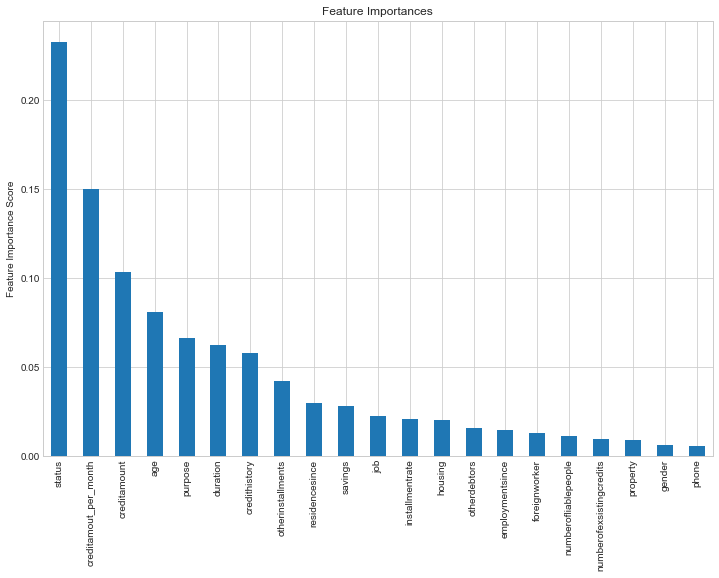

In [27]:
target = 'creditworthy'
train = data
#Choose all predictors except target & IDcols
predictors = [x for x in data.columns if x not in [target]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)


Model Report
Accuracy : 0.903
AUC Score (Train): 0.953478
CV Score : Mean - 0.775932 | Std - 0.03326395 | Min - 0.7106718 | Max - 0.800885


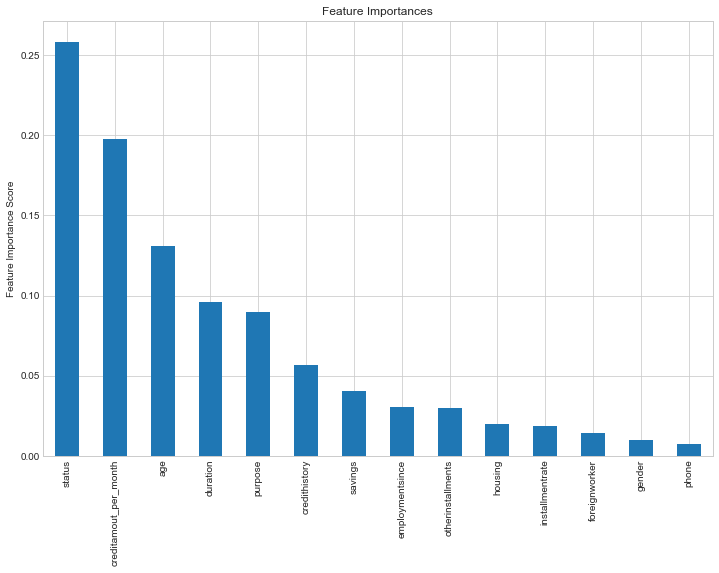

In [28]:
target = 'creditworthy'
train = data_important
#Choose all predictors except target & IDcols
predictors = [x for x in data_important.columns if x not in [target]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)